In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
%matplotlib inline
from glob import glob

In [47]:
mask_files=glob("C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\*\\*_mask*")

In [48]:
mask_files

['C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_10_mask.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_11_mask.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_12_mask.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_13_mask.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_14_mask.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_15_mask.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909

In [49]:
train_files=[file.replace('_mask','')for file in mask_files]

In [50]:
train_files

['C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_10.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_11.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_12.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_13.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_14.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_15.tif',
 'C:\\Users\\ASUS\\Documents\\brain_tumor_detection\\lgg-mri-segmentation\\kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_16.tif',
 'C:\\Users\\ASUS\\D

In [51]:
def diagnosis(mask_path):
    value=np.max(cv2.imread(mask_path))
    return '1' if value>0 else '0'

In [52]:
df=pd.DataFrame({'image_path':train_files,
                 'mask_path':mask_files,
                 'diagnosis':[diagnosis(x)for x in mask_files]})

                 

In [53]:
df.head()

,image_path,mask_path,diagnosis
0,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,0
1,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,1
2,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,1
3,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,1
4,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,1


In [54]:
df['diagnosis'].value_counts()

diagnosis
0    2556
1    1373
Name: count, dtype: int64

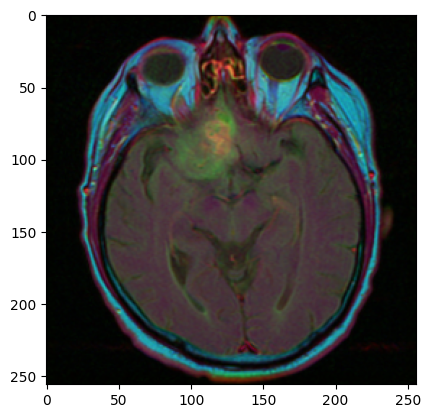

In [55]:
image = cv2.imread(df.image_path[1])
plt.imshow(image)

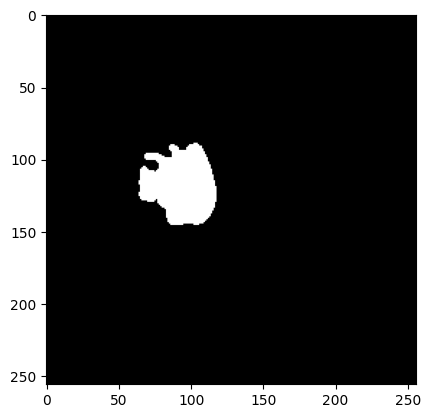

In [56]:
image1 = cv2.imread(df.mask_path[1301])
plt.imshow(image1)

In [13]:
cv2.imread(df.mask_path[1301]).max()

255

In [14]:
cv2.imread(df.mask_path[1301]).min()

0

In [15]:
df['diagnosis']

0       0
1       1
2       1
3       1
4       1
       ..
3924    0
3925    0
3926    0
3927    0
3928    0
Name: diagnosis, Length: 3929, dtype: object

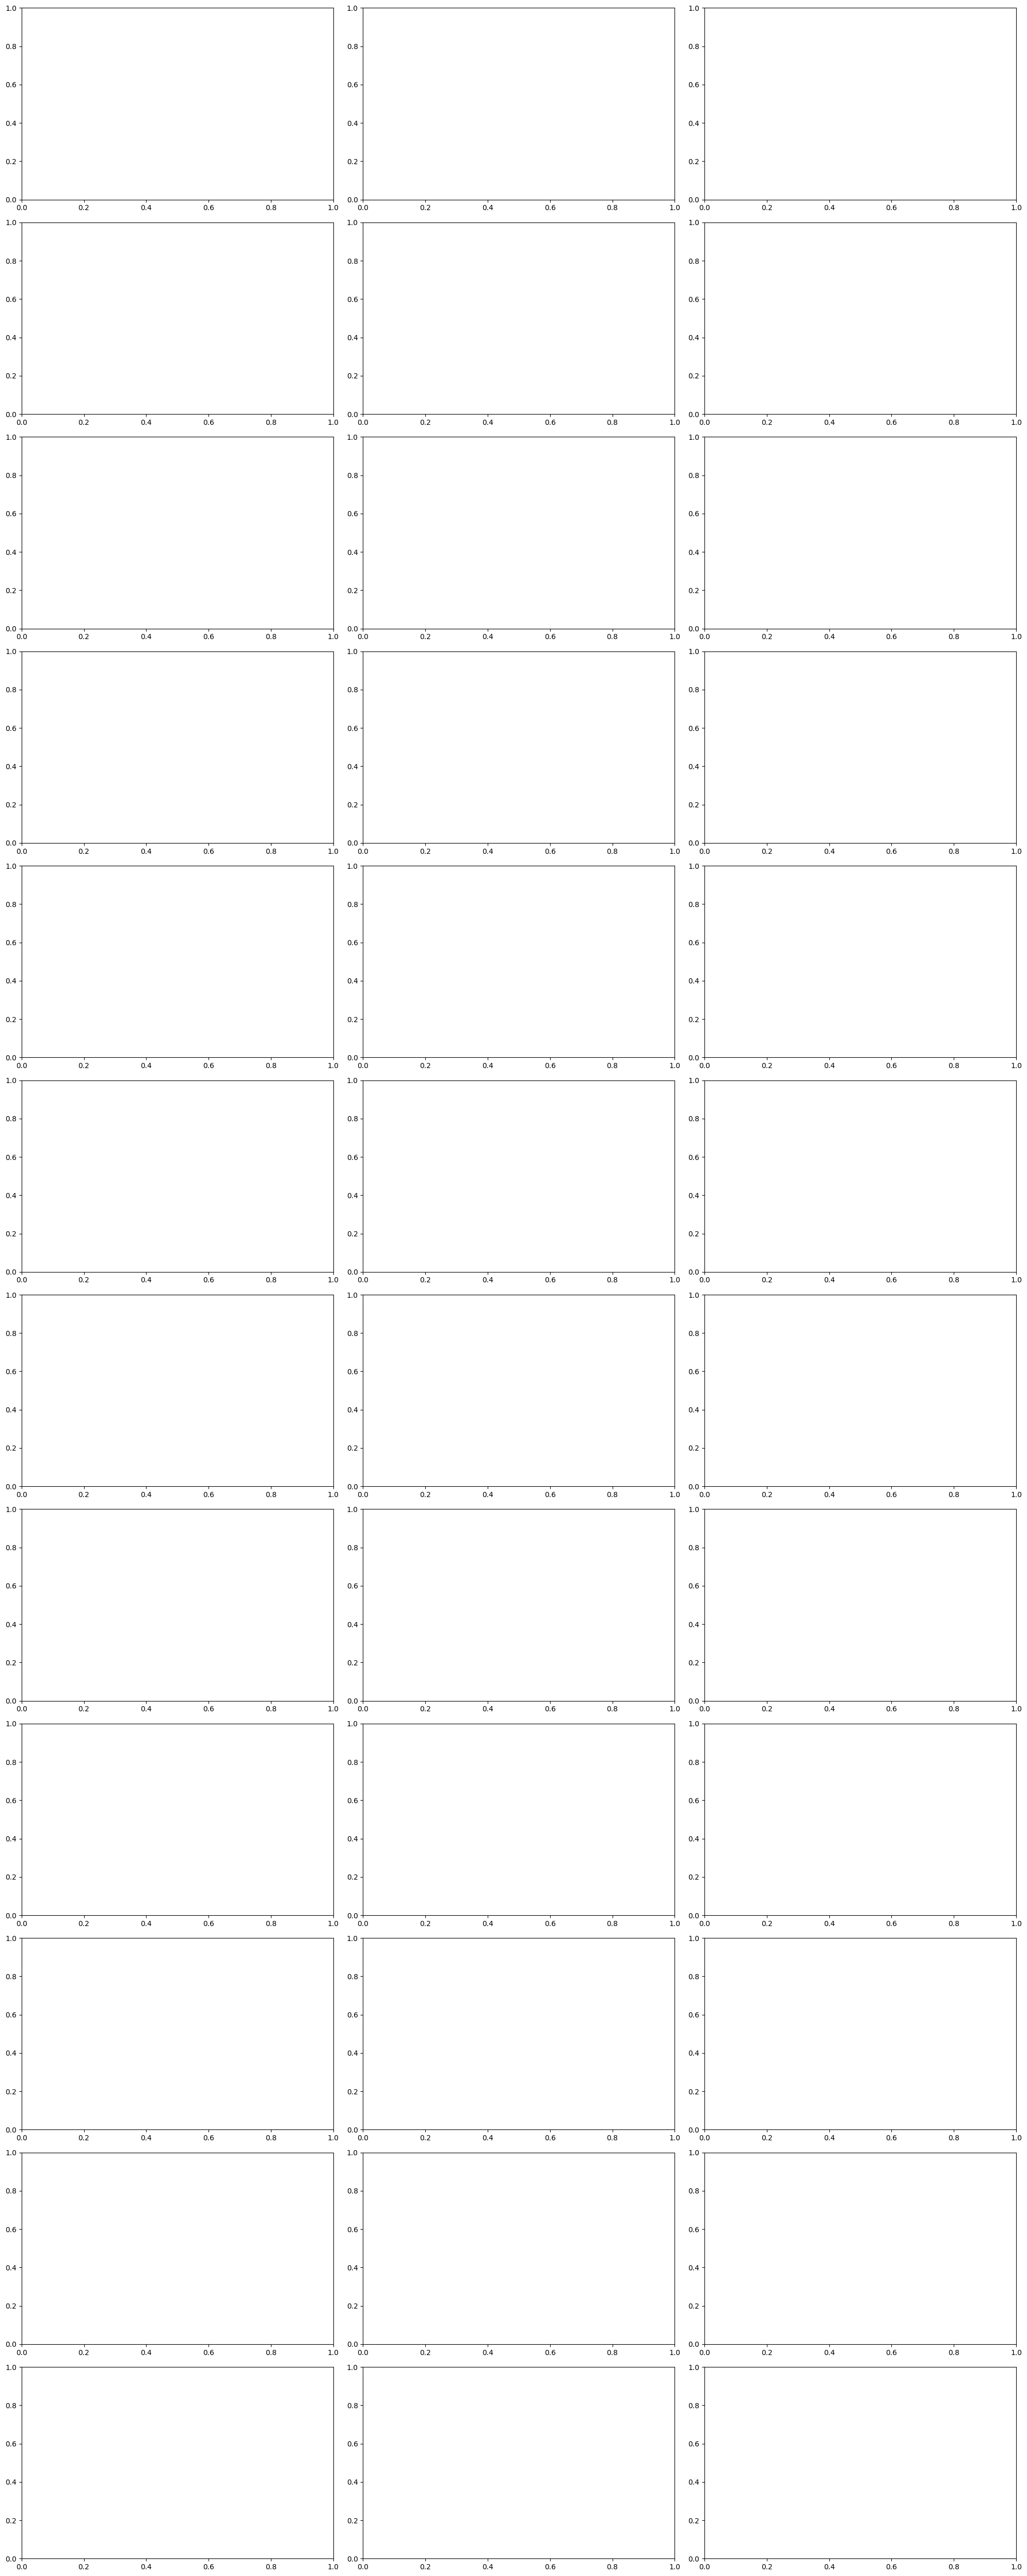

In [16]:
count = 0
fig, axs = plt.subplots(12, 3, figsize = (20, 50))
for i in range(len(df)):
  if df['diagnosis'][i] ==1 and count <5:
    img = io.imread(df.image_path[i])
    axs[count][0].title.set_text('Brain MRI')
    axs[count][0].imshow(img)
    
    mask = io.imread(df.mask_path[i])
    axs[count][1].title.set_text('Mask')
    axs[count][1].imshow(mask, cmap = 'gray')
    
    img[mask == 255] = (255, 0, 0) #Red color
    axs[count][2].title.set_text('MRI with Mask')
    axs[count][2].imshow(img)
    count+=1

fig.tight_layout()

In [17]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: str(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   diagnosis   3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.15)

In [34]:
test.shape

(590, 3)

In [35]:
test

,image_path,mask_path,diagnosis
712,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,0
3919,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,0
3469,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,0
3642,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,0
1689,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,0
...,...,...,...
3018,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,1
500,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,0
2437,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,1
1154,C:\Users\ASUS\Documents\brain_tumor_detection\...,C:\Users\ASUS\Documents\brain_tumor_detection\...,0


In [19]:
train.shape

(3339, 3)

In [20]:
test.shape

(590, 3)

In [21]:
# create an image generator
from keras_preprocessing.image import ImageDataGenerator

#Create a data generator which scales the data from 0 to 1 and makes validation split of 0.15
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)

train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='diagnosis',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='diagnosis',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Create a data generator for test images
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='image_path',
y_col='diagnosis',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))

Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [22]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [23]:
for layer in basemodel.layers:
  layers.trainable = False

In [24]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)


In [25]:
model = Model(inputs = basemodel.input, outputs = headmodel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [27]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


In [28]:
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [29]:
model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

177/177 [==============================] - ETA: 0s - loss: 0.7231 - accuracy: 0.6964
Epoch 1: val_loss improved from inf to 0.64307, saving model to classifier-resnet-weights.hdf5


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


177/177 [==============================] - 966s 5s/step - loss: 0.7231 - accuracy: 0.6964 - val_loss: 0.6431 - val_accuracy: 0.6573


In [31]:
test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1)

# Obtain the predicted class from the model prediction
predict = []
for i in test_predict:
  predict.append(str(np.argmax(i)))
predict = np.asarray(predict)

36/36 [==============================] - 31s 848ms/step


In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(, predict)
accuracy

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(original, predict, labels = [0,1])
print(report)

In [59]:
df_mask = df[df['diagnosis'] == '1']
df_mask.shape

(1373, 3)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(df_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)

In [61]:
train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

# Utilities file contains the code for custom data generator
from utilities import DataGenerator

# create image generators
training_generator = DataGenerator(train_ids,train_mask)
validation_generator = DataGenerator(val_ids,val_mask)
 

ModuleNotFoundError: No module named 'utilities'

In [ ]:
def resblock(X, f):

  # make a copy of input
  X_copy = X

  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X) 

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)

  X_copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

  # Adding the output from main path and short path together
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

In [ ]:
input_shape = (256,256,3)

# Input tensor shape
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Final Output
output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )

In [ ]:
# Utilities file also contains the code for custom loss function
from utilities import focal_tversky, tversky

# Compile the model
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [ ]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs.
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="ResUNet-weights.hdf5", verbose=1, save_best_only=True)

model_seg.fit(training_generator, epochs = 1, validation_data = validation_generator, callbacks = [checkpointer, earlystopping])

In [ ]:
from utilities import prediction

# making prediction
image_id, mask, has_mask = prediction(test, model, model_seg)

In [ ]:
# creating a dataframe for the result
df_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})

# Merge the dataframe containing predicted results with the original test data.
df_pred = test.merge(df_pred, on = 'image_path')
df_pred.head()


In [ ]:
count = 0 
fig, axs = plt.subplots(10, 5, figsize=(30, 50))
for i in range(len(df_pred)):
  if df_pred['has_mask'][i] == 1 and count < 5:
    # read the images and convert them to RGB format
    img = io.imread(df_pred.image_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # Obtain the mask for the image 
    mask = io.imread(df_pred.mask_path[i])
    axs[count][1].title.set_text("Original Mask")
    axs[count][1].imshow(mask)

    # Obtain the predicted mask for the image 
    predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round()
    axs[count][2].title.set_text("AI Predicted Mask")
    axs[count][2].imshow(predicted_mask)
    
    # Apply the mask to the image 'mask==255'
    img[mask == 255] = (255, 0, 0)
    axs[count][3].title.set_text("MRI with Original Mask (Ground Truth)")
    axs[count][3].imshow(img)

    img_ = io.imread(df_pred.image_path[i])
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img_[predicted_mask == 1] = (0, 255, 0)
    axs[count][4].title.set_text("MRI with AI Predicted Mask")
    axs[count][4].imshow(img_)
    count += 1

fig.tight_layout()